
# Social Network Analysis  A.A. 2020/21: 
<b><font size="4.8" color='red'>Data Understanding of "data_subreddit.csv "</font><br></b>
    
<font size="3"> Crossposting of subreddits in social network "Reddit"</font>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("data_subreddit.csv")

In [3]:
#Same functions
#The "delete_duplicate" function checks if there are duplicate rows in the dataframe and if so, deletes them.

def delete_duplicate(df):   
    tot_1=df.shape
    df=df.drop_duplicates()
    tot_f=df.shape
    dif=tot_1[0]-tot_f[0]
    if dif>0:
        print('The dataframe contains ', dif ,' duplicate rows')
        print('Duplicates have been eliminated')
    else:
        print("The dataframe Don't contains duplicate rows") 
        
    return df
  

 # the measures_df function gives us the number of columns and rows of the dataframe df. 
 # It also evaluates if there are null values 

def misures_df(df):       
    print('The "data_subreddit" dataframe has ',df.size, 'Elements.')
    print('Number of rows =',df.shape[1],', Number of columns =',df.shape[0])
    print('Does the matrix have null values? ', df.isnull().any().any())
 

### Analysis of the "data_subreddit" .


In [4]:
delete_duplicate(df)
misures_df(df)

The dataframe Don't contains duplicate rows
The "data_subreddit" dataframe has  1683352 Elements.
Number of rows = 8 , Number of columns = 210419
Does the matrix have null values?  False


In [5]:
df.head(10)

,Unnamed: 0,from,to,id,title,score,date,comments
0,0,environment,EcoNewsNetwork,msh70b,"Republican Sen. Lindsey Graham: ""I've come to ...",48.0,1.618651e+09,3.0
1,1,environment,europe,msp5xh,‘Forests are not renewable’: the felling of Sw...,12.0,1.618688e+09,1.0
2,2,environment,nature,msp64s,‘Forests are not renewable’: the felling of Sw...,3.0,1.618688e+09,0.0
3,3,environment,MachineThatMakesMoney,ms7msc,Mock lobster: Lab-grown seafood company Cultur...,1.0,1.618622e+09,0.0
4,4,environment,collapse,msosea,"‘This is it. If we don’t amp up, we’re goners’...",2.0,1.618687e+09,5.0
5,5,environment,Environmentalism,msqd30,“Climate advocates keep saying: ‘This is it. T...,3.0,1.618693e+09,0.0
6,6,environment,Communalists,msq4xx,India’s oldest birds sanctuary is battling for...,11.0,1.618693e+09,1.0
7,7,environment,Ecosocialism,msq4rg,India’s oldest birds sanctuary is battling for...,2.0,1.618693e+09,1.0
8,8,environment,AsianSocialists,msq4i4,India’s oldest birds sanctuary is battling for...,1.0,1.618693e+09,1.0
9,9,environment,IndianLeft,msq4d2,India’s oldest birds sanctuary is battling for...,4.0,1.618693e+09,1.0


### I create a new column called "new_date" in the dataframe df.
So what reddit is giving you is a UNIX TIMESTAMP which is basically the seconds since Jan 01 1970. (UTC) that needs to be converted into a human-readable date time setup.
I would suggest using the datatime module in python:
"new_date" contains the values ​​of the "date" column  transformed into date.

In [6]:
# first I create an empty list called "new_data", where later we will enter the date of the "date" column 
# converted into date format. I insert the converted date in the list (new_date") with a loop.

new_date=[]

for i in range(df.shape[0]):
    d=[]
    d=int(df["date"][i])
    new_date.append(datetime.datetime.fromtimestamp(d).strftime('%Y-%m-%d %H:%M:%S'))


In [7]:
# Now we will use this list to assign values to the “new_date ” column that we will insert in the dataframe.
df["new_date"]=new_date

df.head(5)

,Unnamed: 0,from,to,id,title,score,date,comments,new_date
0,0,environment,EcoNewsNetwork,msh70b,"Republican Sen. Lindsey Graham: ""I've come to ...",48.0,1.618651e+09,3.0,2021-04-17 11:24:55
1,1,environment,europe,msp5xh,‘Forests are not renewable’: the felling of Sw...,12.0,1.618688e+09,1.0,2021-04-17 21:39:14
2,2,environment,nature,msp64s,‘Forests are not renewable’: the felling of Sw...,3.0,1.618688e+09,0.0,2021-04-17 21:39:43
3,3,environment,MachineThatMakesMoney,ms7msc,Mock lobster: Lab-grown seafood company Cultur...,1.0,1.618622e+09,0.0,2021-04-17 03:05:28
4,4,environment,collapse,msosea,"‘This is it. If we don’t amp up, we’re goners’...",2.0,1.618687e+09,5.0,2021-04-17 21:08:39


From the date, that is from the "new_date" attribute,  we extrapolate the attributes :"days","time" ,"year", "month", "day","hour", and "day_week"

In [8]:
df['new_date'] = pd.to_datetime(df['new_date'], errors='coerce')
df['days'] = df['new_date'].dt.date
df['time'] = df['new_date'].dt.time
df['year'] = df['new_date'].dt.year
df['month'] = df['new_date'].dt.month
df['day'] = df['new_date'].dt.day
df['hour'] = df['new_date'].dt.hour
df['day_week']=df['new_date'].dt.weekday

In [9]:
df.head()

,Unnamed: 0,from,to,id,title,score,date,comments,new_date,days,time,year,month,day,hour,day_week
0,0,environment,EcoNewsNetwork,msh70b,"Republican Sen. Lindsey Graham: ""I've come to ...",48.0,1.618651e+09,3.0,2021-04-17 11:24:55,2021-04-17,11:24:55,2021,4,17,11,5
1,1,environment,europe,msp5xh,‘Forests are not renewable’: the felling of Sw...,12.0,1.618688e+09,1.0,2021-04-17 21:39:14,2021-04-17,21:39:14,2021,4,17,21,5
2,2,environment,nature,msp64s,‘Forests are not renewable’: the felling of Sw...,3.0,1.618688e+09,0.0,2021-04-17 21:39:43,2021-04-17,21:39:43,2021,4,17,21,5
3,3,environment,MachineThatMakesMoney,ms7msc,Mock lobster: Lab-grown seafood company Cultur...,1.0,1.618622e+09,0.0,2021-04-17 03:05:28,2021-04-17,03:05:28,2021,4,17,3,5
4,4,environment,collapse,msosea,"‘This is it. If we don’t amp up, we’re goners’...",2.0,1.618687e+09,5.0,2021-04-17 21:08:39,2021-04-17,21:08:39,2021,4,17,21,5


In [10]:
misures_df(df)

The "data_subreddit" dataframe has  3366704 Elements.
Number of rows = 16 , Number of columns = 210419
Does the matrix have null values?  False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210419 entries, 0 to 210418
Data columns (total 16 columns):
Unnamed: 0    210419 non-null int64
from          210419 non-null object
to            210419 non-null object
id            210419 non-null object
title         210419 non-null object
score         210419 non-null float64
date          210419 non-null float64
comments      210419 non-null float64
new_date      210419 non-null datetime64[ns]
days          210419 non-null object
time          210419 non-null object
year          210419 non-null int64
month         210419 non-null int64
day           210419 non-null int64
hour          210419 non-null int64
day_week      210419 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(6), object(6)
memory usage: 25.7+ MB


### With the descibe function we go to display the maximum, minimum values  etc ..contained in each attribute (column) of our dataframe

In [12]:
df.describe()

,Unnamed: 0,score,date,comments,year,month,day,hour,day_week
count,210419.000000,210419.000000,2.104190e+05,210419.000000,210419.000000,210419.000000,210419.000000,210419.000000,210419.000000
mean,72.236827,275.725296,1.612117e+09,11.156435,2020.769346,4.327931,15.415305,9.981684,2.952956
std,74.993692,1907.545862,1.066043e+07,91.427543,0.471757,2.714943,8.227474,6.994957,1.986641
min,0.000000,0.000000,1.504251e+09,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000
25%,17.000000,3.000000,1.610987e+09,0.000000,2021.000000,3.000000,9.000000,4.000000,1.000000
50%,47.000000,16.000000,1.616548e+09,1.000000,2021.000000,4.000000,15.000000,9.000000,3.000000
75%,104.000000,78.000000,1.618142e+09,5.000000,2021.000000,4.000000,21.000000,15.000000,5.000000
max,557.000000,96863.000000,1.619042e+09,12518.000000,2021.000000,12.000000,31.000000,23.000000,6.000000


### Let's analyze the crosspost date, so we analyze the most important new attributes created by the "date" attribute:
<font size="3">A Bar Chart  give each attribute that gives us an immediate view of their content.


In [13]:
color1=[plt.cm.Blues(150),plt.cm.Set1(7),plt.cm.Accent(0),'red',plt.cm.Set3(9),plt.cm.Set1(8),plt.cm.tab10(9),'darkorange']
color2=[plt.cm.tab10(0),plt.cm.tab10(6),plt.cm.Accent(0),plt.cm.tab10(2),plt.cm.tab10(3),plt.cm.tab10(0),plt.cm.tab10(4)]
color3=[plt.cm.Set3(9),'red',plt.cm.Accent(0),plt.cm.Set1(7),plt.cm.Blues(150)]


C:\Users\cinzia\anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


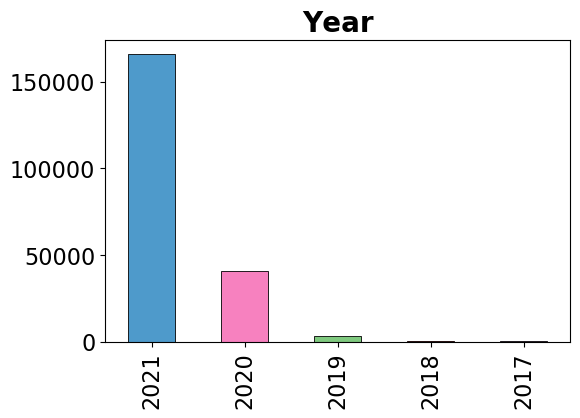

In [14]:
plt.figure(dpi=100)
df['year'].value_counts().plot.bar(colors=color1,edgecolor='black', linewidth=0.6),
plt.title('Year', fontsize=20,fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [15]:
    val=df['year'].value_counts()
    print('Values or names contained in the attribute "year" and associated quantities\n')
    val

Values or names contained in the attribute "year" and associated quantities



2021    166019
2020     40859
2019      2966
2018       557
2017        18
Name: year, dtype: int64

<font size="3">The pie chart show us a best gives us a better view of the distribution of crossposts over the years

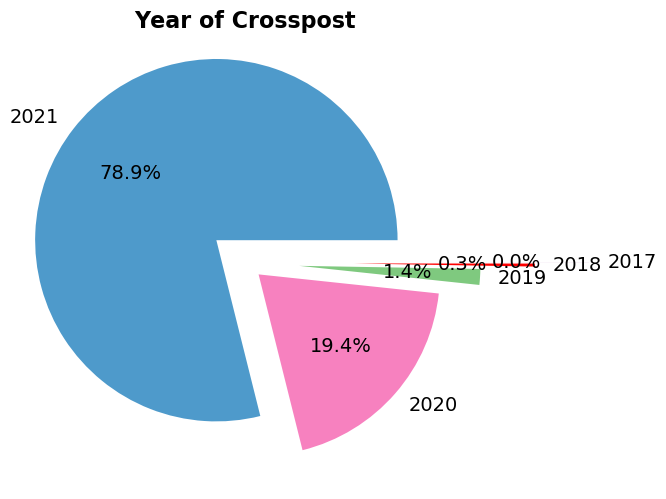

In [16]:
df_year = df['year'].value_counts().rename_axis('year').reset_index(name='crosspost_count')

# = ['#0000e8','#F4A0F2','magenta','#ffcc99']
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.2,0.1, 0.3, 0.6,0.9)  
# Font size of text in pie chart
textprops = {"fontsize":14} # Font size of text in pie chart

wedgeprops = {"linewidth": 4, 'width':1, "edgecolor":"k"} # Width = 1
plt.figure (figsize = (6,6),dpi=100)
plt.pie(df_year.crosspost_count,explode=explode, labels=df_year.year, startangle=0,
        autopct='%.1f%%',textprops =textprops, colors=color1)# Showing shadow of pie chart
plt.title('Year of Crosspost',fontsize=16,fontweight='bold') # Radius to increase or decrease the size of pie chart)

#plt.legend(fontsize=20,loc='upper right') # To show legend
plt.show()



### We analyze the distribution of data by year and month, year and day, year and day of the week
<font size="3"> Below the Bar Charts, and the tables with the numbers and percentages of crosspost<br>
    In "day_week" day 0 is equivalent to Monday, 1 Tuesday to so on

Number of crossposts broken down by  month  and Year:

year   2017  2018  2019  2020   2021
month                               
1         0     6   119   846  15110
2         0    11   122   877  18326
3         0    20    84  1706  48131
4         0    43   196  2442  84452
5         0    19   336  1781      0
6         0    28   195  2831      0
7         0    27   312  2815      0
8         0    47   239  4201      0
9         1    52   248  4426      0
10        2    67   233  5224      0
11        4   113   419  4802      0
12       11   124   463  8908      0

Percentage of crossposts broken down by  month  and Year:

year       2017      2018      2019      2020      2021
month                                                  
1      0.000000  0.000373  0.007400  0.052609  0.939618
2      0.000000  0.000569  0.006309  0.045356  0.947766
3      0.000000  0.000400  0.001682  0.034160  0.963757
4      0.000000  0.000493  0.002249  0.028026  0.969231
5      0.000000  0.008895  0.15

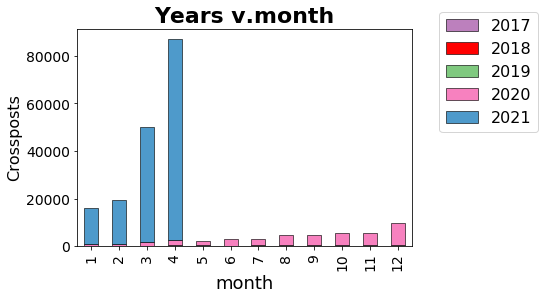

Number of crossposts broken down by  day  and Year:

year  2017  2018  2019  2020  2021
day                               
1        1    54    95  1086  3829
2        0    28   148  1257  5257
3        0    18    74  1480  4747
4        1    16   112  1415  4354
5        0    13    52  1098  5494
6        0    14    33  1205  4749
7        0    21    55  1053  5513
8        0    10    79  1233  4881
9        0    11    33  1211  5337
10       0    23    72  1443  5076
11       0    13    96  1459  5571
12       4     4    96  1242  7266
13       1     6   119  1466  7104
14       3    25   101  1373  7896
15       0    15    85  1468  8359
16       1    12    72  1210  9210
17       0     5    99  1253  9733
18       0    75   111  1180  9346
19       0    11   118  1574  8175
20       2    14   126  1686  6606
21       2     4   143  1252  2991
22       0    10    95  1183  2221
23       0    11   127  1308  2136
24       1    19   125  1299  2391
25       2    10   101  1389  4090
26

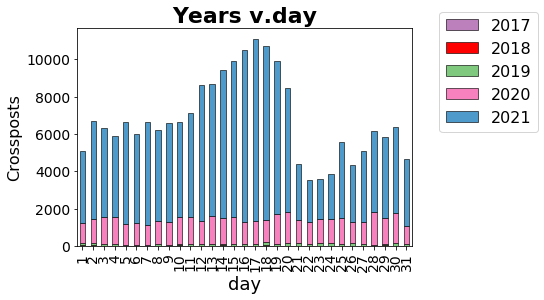

Number of crossposts broken down by  hour  and Year:

year  2017  2018  2019  2020  2021
hour                              
0        2    27   146  2137  9214
1        0    21   148  2142  9484
2        0    19   158  2177  9959
3        0    28   157  2252  9397
4        0    23   146  2589  9123
5        1    18   145  2263  8336
6        0    18   173  2218  8174
7        0    20   173  1972  7760
8        3    21   142  1822  7766
9        1    32   103  1983  7866
10       2    27   108  1757  7485
11       0    32   130  1889  6787
12       1    69   127  1614  6960
13       2    47   111  1536  6371
14       1    15   138  1266  5455
15       1    23    98  1258  4917
16       1    11    68  1016  4932
17       0    18    72  1077  4064
18       2    14    57   939  3989
19       0     9    82  1064  3722
20       0    16    83  1073  4327
21       1    13    93  1502  5775
22       0    14   150  1456  6811
23       0    22   158  1857  7345

Percentage of crossposts broken dow

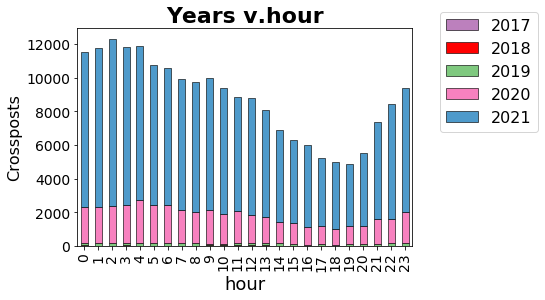

Number of crossposts broken down by  day_week  and Year:

year      2017  2018  2019  2020   2021
day_week                               
0            1    72   410  5821  23642
1            5   109   389  6135  26134
2            1    62   391  5574  22281
3            4    89   398  6482  24349
4            4    69   553  5887  24227
5            3    72   445  5411  23007
6            0    84   380  5549  22379

Percentage of crossposts broken down by  day_week  and Year:

year          2017      2018      2019      2020      2021
day_week                                                  
0         0.000033  0.002404  0.013691  0.194383  0.789488
1         0.000153  0.003326  0.011870  0.187202  0.797449
2         0.000035  0.002190  0.013812  0.196899  0.787064
3         0.000128  0.002841  0.012707  0.206947  0.777377
4         0.000130  0.002245  0.017990  0.191509  0.788126
5         0.000104  0.002488  0.015378  0.186986  0.795045
6         0.000000  0.002959  0.013384  0.19544

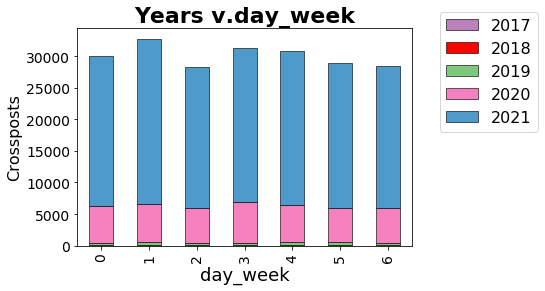

In [17]:

for i in [12,13,14,15]:
    
    a=[]   
    a_pct=[]
    a = pd.crosstab(df[df.columns[i]], df['year'])
    a_pct =a.div(a.sum(1).astype(float), axis=0)
    print('Number of crossposts broken down by ',df.columns[i] ,' and Year:\n' )
    print(a) 
    print('\nPercentage of crossposts broken down by ',df.columns[i] ,' and Year:\n' )
    print(a_pct)
    a.plot(kind='bar',alpha=1, stacked=True, color=color3,edgecolor='black', linewidth=0.6)
    plt.title('Years v.'+ df.columns[i],fontsize=22, fontweight='bold')
    plt.xlabel(df.columns[i],fontsize=18)
    plt.ylabel('Crossposts', fontsize=16)
    plt.legend( fontsize=16,bbox_to_anchor=(1.4,0.8),loc='right')
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.show()
    



### Let's analyze the "score" and "comments" attributes

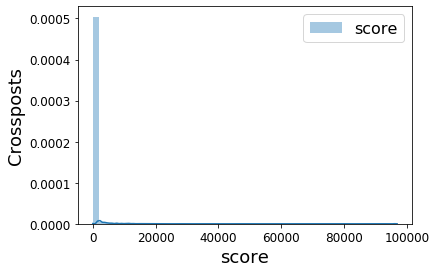

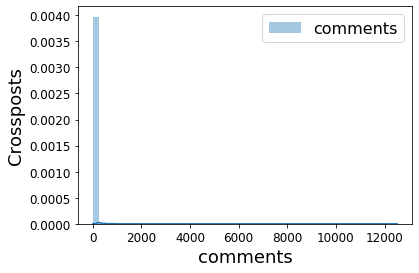

In [18]:
import seaborn as sns, numpy as np
for i in [5,7]:
    df_sc=[]
    df_sc= df[df.columns[i]]
   # sns.distplot(df_sc, x=df.columns[i], kde=True)
    sns.distplot(df_sc,hist =True, kde=True, label=df.columns[i])
    plt.xlabel(df.columns[i],size=18)
    plt.ylabel('Crossposts',size=18)
    plt.legend(loc="best", fontsize=16, frameon=True)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()
    


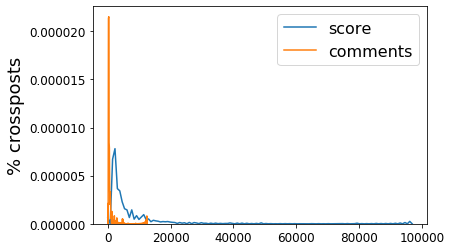

In [19]:
import seaborn as sns, numpy as np
color5=['blue','deepskyblue']
for i in [5,7]:
    df_sc=[]
    df_sc= df[df.columns[i]]
   # sns.distplot(df_sc, x=df.columns[i], kde=True)
  
    sns.distplot(df_sc,hist =False, kde=True,bins=30, label=df.columns[i])
                                                                                
    plt.xlabel('',size=18)
    plt.ylabel('% crossposts',size=18)
    plt.legend(loc="best", fontsize=16, frameon=True)
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

### Boxplot of "score" e "comments" attributes

0.1        1.0
0.2        2.0
0.3        4.0
0.4        8.0
0.5       16.0
0.6       30.0
0.7       56.0
0.8      112.0
0.9      297.0
1.0    96863.0
Name: score, dtype: float64 

0.1        0.0
0.2        0.0
0.3        0.0
0.4        0.0
0.5        1.0
0.6        2.0
0.7        4.0
0.8        7.0
0.9       17.0
1.0    12518.0
Name: comments, dtype: float64 



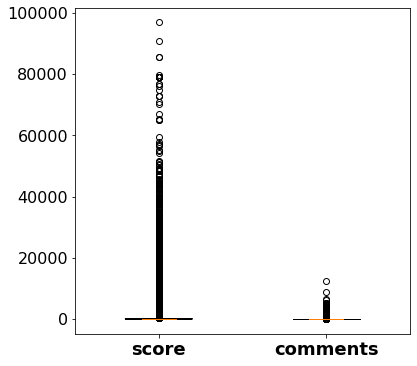

In [20]:
import numpy as np
import matplotlib as mpl
mpl.use('agg')
import matplotlib.pyplot as plot

plt.figure (figsize = (6,6))
box=plt.boxplot([df[df.columns[5]],df[df.columns[7]]],notch=True,widths=0.4, patch_artist=True)
plt.xticks([1,2],[df.columns[5],df.columns[7]],size=18,fontweight='bold')
plt.yticks(size=16)
#Get relevant percentiles and see their distribution
print(df[df.columns[5]].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]),'\n')
print(df[df.columns[7]].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]),'\n')

In [22]:
for i in [1,2,3,4,5,7]:
    val=[]
    val=df[df.columns[i]].value_counts()
    print('Values or names contained in the attribute "'+ df.columns[i]+'" and associated quantities\n')
    print(val,'\n')

Values or names contained in the attribute "from" and associated quantities

ClimateAndEnvironment    548
worldeconomy             527
worldnews247             482
ClimateChangeSolution    481
climateaction            457
mostrewarded             449
ClimateActivism          408
CoolNerd                 406
Covid19_economics        405
COVID19RippleEffects     401
PlayingWithFire          393
Sustainable_Energy       392
CoronaVirusWorldNews     390
CleanEnergy              379
Castelbon                374
USGovernment             374
dumaflache               371
justchinathings          371
surprisinglyhot          371
Economic                 364
VideosPraVerChapado      362
waterAliens              362
thestateofshit           358
Hirnschiss               357
childrenofdemocracy      357
coolthingsformygirl      352
AmerikanSpring           345
kayotic123               345
NaturalPhenomena         343
bending                  343
                        ... 
malaysia                

### We evaluate the correlations between the various attributes
As we see in the "correlations"table, the "Comment" and "score" attributes have a fairly high correlation, as so "year" and "date".
This could be useful to us in order to subsequently choose only one value among those correlated between them.
I suggest keeping the "year" attribute and removing the "date" attribute.
So you can choose the "comment" or "score" attribute,one among them.
Why? Because when the attributes are correlated, it is useless to carry them along in the next stages in both

In [23]:
import seaborn as sb
from collections import defaultdict
from scipy.stats.stats import pearsonr
sb.set(color_codes=True)

In [24]:
tab_corel=df.corr()
tab_corel

,Unnamed: 0,score,date,comments,year,month,day,hour,day_week
Unnamed: 0,1.000000,0.005441,-0.264148,-0.003586,-0.257643,0.138814,0.021897,-0.015047,0.009878
score,0.005441,1.000000,-0.029139,0.700346,-0.023580,0.005024,0.005420,0.023960,-0.002958
date,-0.264148,-0.029139,1.000000,-0.020659,0.894416,-0.368669,-0.014997,-0.003858,-0.005630
comments,-0.003586,0.700346,-0.020659,1.000000,-0.019757,0.009492,0.007831,0.022739,-0.012652
year,-0.257643,-0.023580,0.894416,-0.019757,1.000000,-0.743094,-0.051004,-0.005952,-0.002998
month,0.138814,0.005024,-0.368669,0.009492,-0.743094,1.000000,-0.015328,0.004474,0.001657
day,0.021897,0.005420,-0.014997,0.007831,-0.051004,-0.015328,1.000000,-0.011934,-0.041393
hour,-0.015047,0.023960,-0.003858,0.022739,-0.005952,0.004474,-0.011934,1.000000,-0.027481
day_week,0.009878,-0.002958,-0.005630,-0.012652,-0.002998,0.001657,-0.041393,-0.027481,1.000000


C:\Users\cinzia\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


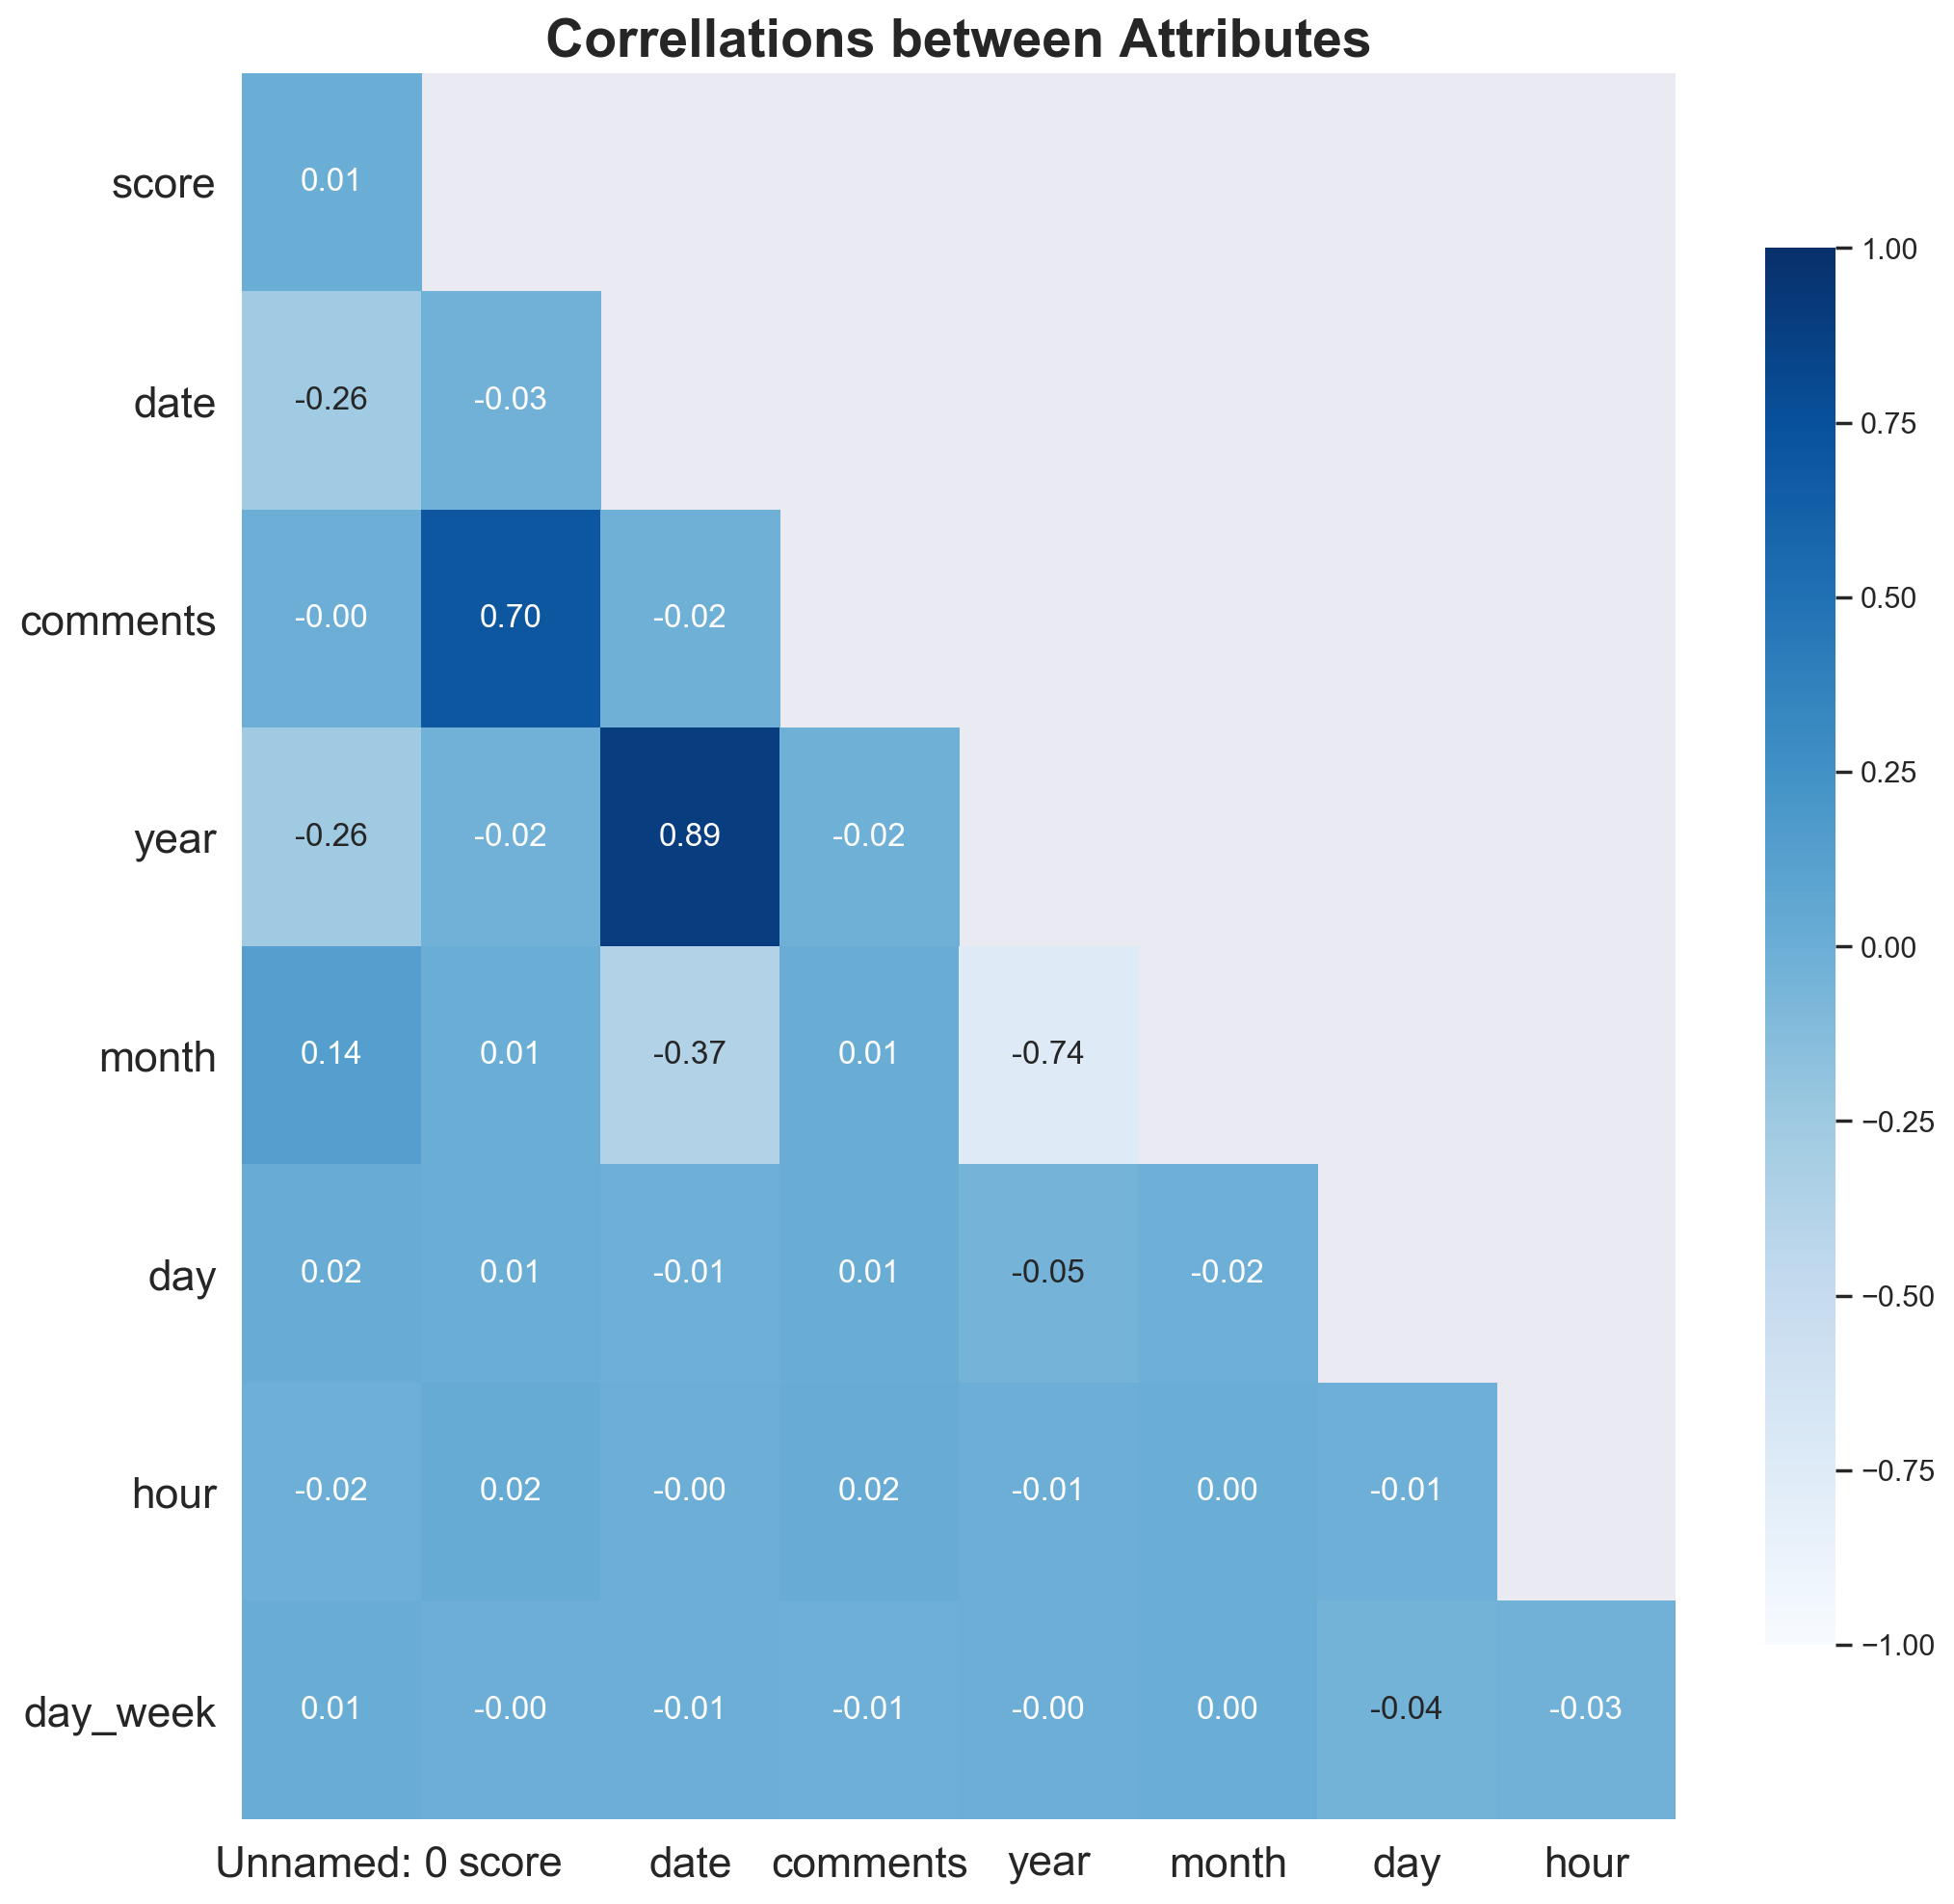

In [29]:

fig, ax = plt.subplots(figsize=(12,12),dpi=200)
# mask
mask = np.triu(np.ones_like(tab_corel, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = tab_corel.iloc[1:,:-1].copy()
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.title('Correllations between Attributes',fontweight='bold', fontsize=20)
# yticks
plt.yticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()
